# 5. Restructuring Analysis
-------------------
Group 3 , October 07, 2022
1. Gezhi Cheng, 
2. Haowei Lee, 
3. Ziyi Liu, 
4.VS Chaitanya Madduri

> <i>Description: In this notebook text frequenceies and profitability are merged. Finally extracting companies with highest restructure efforts</i>


<div class="alert alert-block alert-info">
    <b>FYI:</b> # Please run this notebook in the colab . 
</div> 

### Pre requisites: 
1. And add the shortcut of the drive link :https://drive.google.com/drive/folders/1X4UdGsQiHVWSr63FRiz8rwOuWW5Ua8uI?usp=sharing to your personal drive.


- As the we used colab computation engine and also the files are very large in size. We used our personal google drive folders to save the large data files.

Files:
- df_final.csv - To store the stemmed results and word frequencies. 
- Profitability.csv - calculated profitability index for the seletced companies.

### Output files:

Files:
df_final.csv - To store the stemmed results and word frequencies. 



## 1. Import Required Packages 

In [3]:
# Connecting to the google drive 
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import clear_output

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import re 


In [22]:
# Below command wil print all the records when a dataframe is printed.
# Please avoid running the command if you wish not to see the whole dataframe.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2.Loading the files to the notebook

### 2.1 loading the profitability data

In [5]:
DIR_PATH = "/content/drive/MyDrive/SPM_files/"

# Profitability Analysis
df = pd.read_csv(DIR_PATH + "profitability_data.csv")


In [6]:
# printing the dimensions 
df.shape

(506, 10)

In [7]:
df.head()

,Company_Key,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3
0,764622,2011,0.0561,PINNACLE WEST CAPITAL CORP,0.0707,0.0621,0.0519,25.88,10.69,-7.51
1,764622,2012,0.0707,PINNACLE WEST CAPITAL CORP,0.0621,0.0519,0.0753,-12.07,-26.53,6.59
2,764622,2013,0.0621,PINNACLE WEST CAPITAL CORP,0.0519,0.0753,0.0733,-16.44,21.22,17.92
3,764622,2014,0.0519,PINNACLE WEST CAPITAL CORP,0.0753,0.0733,0.0932,45.07,41.12,79.60
4,764622,2015,0.0753,PINNACLE WEST CAPITAL CORP,0.0733,0.0932,0.0668,-2.72,23.80,-11.36


### 2.2 loading the text mining data

In [8]:
DIR_PATH = "/content/drive/MyDrive/SPM_files/"
df_final = pd.read_csv(DIR_PATH + "final_df_v2.csv")

In [9]:
# printing the descriptive stats 
df_final.describe()

,Company_Key,Year,operation_percentage,negative_percentage,credit_percentage
count,8.300000e+02,830.000000,830.000000,598.000000,830.000000
mean,8.735917e+05,2016.428916,0.012731,0.018420,0.002470
std,5.325722e+05,3.049512,0.003603,0.004572,0.002742
min,4.904000e+03,2011.000000,0.003567,0.005380,0.000000
25%,3.525410e+05,2014.000000,0.009780,0.016157,0.001150
50%,1.021635e+06,2017.000000,0.012743,0.018644,0.001779
75%,1.317630e+06,2019.000000,0.014995,0.021384,0.002771
max,1.783400e+06,2021.000000,0.025175,0.030543,0.033586


In [10]:
df_final.head(2)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name
0,1126956,QTR4,2011,10-K,0001126956 000074 20111121 lacledegroupform10 ...,0.015983,0.018151,0.001653,LACLEDE GROUP INC
1,1126956,QTR4,2011,10-K,0001126956 000075 20111121 lacledegasfor10 k20...,0.019980,0.017551,0.001041,LACLEDE GAS CO


In [11]:
# Printing the sample of records for the company 4904
df_final[df_final['Company_Key']==4904].sample(5)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name
67,4904,QTR1,2012,10-K,0000004904 000013 20140729 ye11aep10k american...,0.017307,0.018253,0.000985,AMERICAN ELECTRIC POWER CO INC
59,4904,QTR1,2011,10-K,nproc type 2001 clear norigin name webmast nor...,0.018614,0.018544,0.001095,COLUMBUS SOUTHERN POWER CO /OH/
304,4904,QTR1,2020,10-K,0000004904 000007 20200220 aep10klegal20194q a...,0.013996,0.017169,0.000786,AMERICAN ELECTRIC POWER CO INC
62,4904,QTR1,2011,10-K,nproc type 2001 clear norigin name webmast nor...,0.018130,0.018302,0.001066,APPALACHIAN POWER CO
75,4904,QTR1,2014,10-K,0000004904 000034 20140328 apcocrrffunding2013...,0.016078,0.008900,0.002871,Appalachian Consumer Rate Relief Funding LLC


In [12]:
# dropping the duplidate records in the dataframe 
df_final.drop_duplicates(inplace=True)

In [13]:
df_final.shape

(830, 9)

In [14]:
# printing the columns of the dataframe
df_final.columns

Index(['Company_Key', 'Quarter_details', 'Year', 'filing_type',
       'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name'],
      dtype='object')

## 3.  Merging the Text mining & profitability data

In [15]:
df3 = df_final.merge(df, left_on=['Company_Key','Year'] , right_on= ['Company_Key',  'year'])

In [16]:
# checking the merged sample of records
df3.sample(2)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3
153,354707,QTR1,2015,10-K,0000354707 000016 20150226 12312014x10k 2014 n...,0.009074,0.019999,0.008172,HAWAIIAN ELECTRIC INDUSTRIES INC,2015,-0.0510,HAWAIIAN ELECTRIC INDUSTRIES INC,-0.0155,-0.0397,-0.0440,-69.65,-22.13,-13.69
472,1528356,NaN,2013,NaN,0001213900 001232 20130321 f10k2012 genieenerg...,0.009173,NaN,0.000395,GENIE ENERGY LTD,2013,-0.2117,GENIE ENERGY LTD.,-0.3496,-0.2468,-0.3997,65.13,16.55,88.78


### 3.1 checking for missing frequencies

In [17]:
# looking for if there is are any missing TEXT DATA  and checking storing the 
# results in new column
df3['isMissing'] = np.where(df3['Text_data_cleaned'].isnull(), 1,0)

In [18]:
df3['isMissing'].value_counts()

0    486
Name: isMissing, dtype: int64

In [19]:
# Considering the cases with flag false which means we are taking the records 
# which has the restructuring defined 
df3 = df3[df3['isMissing']==0]

In [20]:
df3.columns

Index(['Company_Key', 'Quarter_details', 'Year', 'filing_type',
       'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name', 'year', 'profitability',
       'Company_Name', 'profitability_next_1', 'profitability_next_2',
       'profitability_next_3', 'change_next_1', 'change_next_2',
       'change_next_3', 'isMissing'],
      dtype='object')

In [21]:
#printing the final dimension of the files 
df3.shape

(486, 19)

### 3.2 Removing the subsidary company data

In [23]:
# compare the company name from the profitability and 
df3[['Company_Name','compamy_name','year']].sample(15)

,Company_Name,compamy_name,year
273,"EQM MIDSTREAM PARTNERS, LP","EQT Midstream Partners, LP",2016
9,UGI CORP /PA/,UGI CORP /PA/,2014
335,"DOMINION ENERGY, INC",DOMINION ENERGY INC,2014
309,"CLEARWAY ENERGY, INC.","Clearway Energy, Inc.",2019
268,CENTERPOINT ENERGY INC,CENTERPOINT ENERGY INC,2017
464,TARGA RESOURCES PARTNERS LP,TARGA RESOURCES PARTNERS LP,2012
1,SPIRE INC,LACLEDE GAS CO,2011
235,ENTERGY CORP /DE/,ENTERGY LOUISIANA INVESTMENT RECOVERY FUNDING ...,2017
199,BLACK HILLS CORP /SD/,BLACK HILLS CORP /SD/,2017
469,"AMERICAN WATER WORKS COMPANY, INC.",AMERICAN WATER WORKS CO INC,2015


Observation: We have observed that for the few companies the company name from profitability and the 10-k fillings are different. Example the 'AMERICAN ELECTRIC POWER CO INC' has acquired many energy companies from 2011 to 2014. 

- For these subsidary companies there are no record in the profitability data. So we removing this records are and docusing only on the main firm.

In [ ]:
# creating a temporary dataframe to analyize the subsidary firms 
df9 = df3[df3['Company_Key'].isin([65984, 4904, 1126956, 65984])]


In [ ]:
df9[['Company_Name','compamy_name','Year']]['compamy_name'].unique()

array(['LACLEDE GROUP INC', 'LACLEDE GAS CO',
       'COLUMBUS SOUTHERN POWER CO /OH/',
       'AMERICAN ELECTRIC POWER CO INC', 'INDIANA MICHIGAN POWER CO',
       'APPALACHIAN POWER CO', 'OHIO POWER CO',
       'PUBLIC SERVICE CO OF OKLAHOMA', 'SOUTHWESTERN ELECTRIC POWER CO',
       'AEP Texas Central Transition Funding II LLC',
       'AEP Texas Central Transition Funding III LLC',
       'OHIO PHASE-IN-RECOVERY FUNDING LLC',
       'Appalachian Consumer Rate Relief Funding LLC',
       'ENTERGY ARKANSAS INC',
       'Entergy Gulf States Reconstruction Funding I, LLC',
       'Entergy Texas Restoration Funding, LLC',
       'Entergy Arkansas Restoration Funding, LLC',
       'ENTERGY LOUISIANA INVESTMENT RECOVERY FUNDING I, L.L.C.',
       'ENTERGY CORP /DE/', 'SPIRE INC',
       'Entergy New Orleans Storm Recovery Funding I, L.L.C.',
       'Entergy Louisiana, LLC'], dtype=object)

In [ ]:
df9[['Company_Name','compamy_name','Year']]['Company_Name'].unique()

array(['SPIRE INC', 'AMERICAN ELECTRIC POWER CO INC', 'ENTERGY CORP /DE/'],
      dtype=object)

In [ ]:
# removing the companies with the subsidary
df4 = df3[~df3['compamy_name'].isin(['Entergy Gulf States Reconstruction Funding I, LLC',
                                     'Entergy Texas Restoration Funding, LLC','Entergy Arkansas Restoration Funding, LLC','Entergy Arkansas Restoration Funding, LLC','AEP Texas Central Transition Funding III LLC','OHIO PHASE-IN-RECOVERY FUNDING LLC','Appalachian Consumer Rate Relief Funding LLC','LACLEDE GAS CO',
        'OHIO POWER CO',
       'AEP Texas Central Transition Funding II LLC',
       'AEP Texas Central Transition Funding III LLC',
       'OHIO PHASE-IN-RECOVERY FUNDING LLC',
       'Appalachian Consumer Rate Relief Funding LLC',
       'ENTERGY ARKANSAS INC',
       'Entergy Gulf States Reconstruction Funding I, LLC',
       'Entergy Texas Restoration Funding, LLC',
       'Entergy Arkansas Restoration Funding, LLC',
       'ENTERGY LOUISIANA INVESTMENT RECOVERY FUNDING I, L.L.C.',
 
       'Entergy New Orleans Storm Recovery Funding I, L.L.C.',
       'Entergy Louisiana, LLC'])]

In [ ]:
# checking for duplicates again(just to make sure)
df5 = df4.drop_duplicates(['Text_data_cleaned'])

In [ ]:
# cleaned dataframe dimension 
df5.shape

(431, 19)

In [ ]:
df5.head(2)

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,isMissing
0,1126956,QTR4,2011,10-K,0001126956 000074 20111121 lacledegroupform10 ...,0.015983,0.018151,0.001653,LACLEDE GROUP INC,2011,-0.1127,SPIRE INC,-0.0891,-0.0834,-0.0765,-20.87,-26.00,-32.10,0
2,1126956,QTR4,2012,10-K,0001126956 000080 20121119 lacledegroupform10 ...,0.007124,0.013886,0.009069,LACLEDE GROUP INC,2012,-0.0891,SPIRE INC,-0.0834,-0.0765,-0.0449,-6.48,-14.19,-49.65,0


In [ ]:
# Printing all the company & year combinations to make sure there are 
# no double entries.
df5[['compamy_name','year']].value_counts()

compamy_name                               year
ADVANCED DISPOSAL SERVICES                 2016    1
PERMA-FIX ENVIRONMENTAL SVCS               2012    1
PATTERN ENERGY GROUP INC                   2016    1
                                           2015    1
                                           2014    1
PACIFIC GAS & ELECTRIC Co                  2013    1
ORMAT TECHNOLOGIES INC                     2018    1
                                           2017    1
                                           2016    1
                                           2015    1
                                           2014    1
                                           2013    1
                                           2012    1
                                           2011    1
OGE ENERGY CORP.                           2018    1
                                           2017    1
                                           2016    1
                                           2015    

In [ ]:
# just playing with dataframe 
# assigning the final dataframe to the df3
df3 = df5.copy()

## 4. Ranking the records for company with most restructuring effects

In [ ]:
# sort the records of the dataframe based on the operation_percentage (which emphasizes the restructuring effects) 
re_cpm_df = df3.sort_values("operation_percentage", ascending=False)
re_cpm_df.head()

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,isMissing
48,92122,QTR1,2015,10-K,0000092122 000015 20150629 kx12312014 2014 nta...,0.020915,0.012591,0.002073,SOUTHERN CO,2015,0.0793,SOUTHERN CO,0.0735,0.0486,0.0489,-7.29,-38.74,-38.33,0
213,92122,QTR1,2016,10-K,0000092122 000126 20160226 kx12312015 ntabl co...,0.020484,0.012959,0.001905,SOUTHERN CO,2016,0.0735,SOUTHERN CO,0.0486,0.0489,0.1099,-33.93,-33.49,49.61,0
214,92122,QTR1,2017,10-K,0000092122 000007 20170222 kx12312016 ndocumen...,0.020260,0.012924,0.002614,ALABAMA POWER CO,2017,0.0486,SOUTHERN CO,0.0489,0.1099,0.1054,0.67,126.42,117.07,0
136,1161728,QTR1,2015,10-K,0001161728 000003 20150226 f10k 2014 form nfor...,0.020112,0.018483,0.001284,MGE ENERGY INC,2015,0.0266,MGE ENERGY INC,0.0403,0.0551,0.0346,51.44,107.03,29.89,0
47,92122,QTR1,2014,10-K,0000092122 000012 20140912 kx12312013 2013 nta...,0.020106,0.013023,0.002333,SOUTHERN CO,2014,0.0506,SOUTHERN CO,0.0793,0.0735,0.0486,56.55,45.14,-4.10,0


In [ ]:
# droping the duplicates
# re_cpm_df.drop_duplicates( keep='last', inplace=True)

In [ ]:
# To have a uniform index
re_cpm_df.reset_index(drop=True, inplace=True)


In [ ]:
# Intializing the restructing flag with zero
re_cpm_df['is_restructuring'] = 0

In [ ]:
# Classifying the Top3 companies with restrucing frequency as restructing companies
re_cpm_df[:round(re_cpm_df.shape[0] * 0.3)+1]['is_restructuring'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
re_cpm_df.tail()

,Company_Key,Quarter_details,Year,filing_type,Text_data_cleaned,operation_percentage,negative_percentage,credit_percentage,compamy_name,year,profitability,Company_Name,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,isMissing,is_restructuring
426,1047862,NaN,2015,NaN,0001193125 054350 20150219 d821872d10k ntabl c...,0.005090,NaN,0.000705,CONSOLIDATED EDISON INC,2015,0.0052,CONSOLIDATED EDISON INC,0.0194,0.0405,0.0307,270.40,672.82,484.99,0,0
427,1130310,QTR1,2011,10-K,0001130310 000015 20110325 tbcform10 form dece...,0.004764,0.016883,0.019641,CENTERPOINT ENERGY TRANSITION BOND CO LLC,2011,0.0625,CENTERPOINT ENERGY INC,0.0219,-0.0303,-0.0300,-64.96,-148.42,-147.95,0,0
428,891532,NaN,2015,NaN,0001437749 006469 20150331 perma20141231 form ...,0.004485,NaN,0.000983,PERMA-FIX ENVIRONMENTAL SVCS,2015,-0.0631,PERMA FIX ENVIRONMENTAL SERVICES INC,-0.1442,-0.0977,-0.0946,128.54,54.83,49.83,0,0
429,922224,QTR1,2011,10-K,nproc type 2001 clear norigin name webmast nor...,0.003952,0.010891,0.018184,PPL ELECTRIC UTILITIES CORP,2011,0.0478,PPL CORP,0.0574,0.0544,0.0969,20.14,13.91,102.99,0,0
430,727273,QTR1,2013,10-K,0000727273 000008 20130315 form10k 2012 form y...,0.003845,0.014303,0.006961,CADIZ INC,2013,-24.7789,CADIZ INC,-17.5245,-25.1521,-16.9822,-29.28,1.51,-31.47,0,0


In [ ]:
re_cpm_df['operation_percentage'].describe()

count    431.000000
mean       0.012522
std        0.003490
min        0.003845
25%        0.009685
50%        0.012291
75%        0.015109
max        0.020915
Name: operation_percentage, dtype: float64

In [ ]:
re_cpm_df[re_cpm_df['is_restructuring']==1]['operation_percentage'].describe()

count    130.000000
mean       0.016723
std        0.001568
min        0.014719
25%        0.015368
50%        0.016391
75%        0.018031
max        0.020915
Name: operation_percentage, dtype: float64

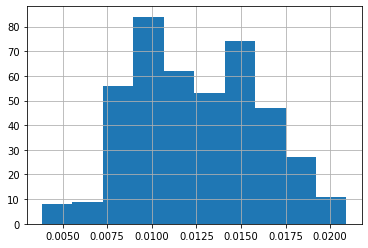

In [ ]:
# Disturbution of the operation_percentage (restructuring words frequency)
re_cpm_df['operation_percentage'].hist()

In [ ]:
re_cpm_df.columns

Index(['Company_Key', 'Quarter_details', 'Year', 'filing_type',
       'Text_data_cleaned', 'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name', 'year', 'profitability',
       'Company_Name', 'profitability_next_1', 'profitability_next_2',
       'profitability_next_3', 'change_next_1', 'change_next_2',
       'change_next_3', 'isMissing', 'is_restructuring'],
      dtype='object')

In [ ]:
# Selecting the columns which are required for the T-test
col = ['Company_Key', 'Quarter_details', 'Year', 'filing_type',
        'operation_percentage', 'negative_percentage',
       'credit_percentage', 'compamy_name', 'profitability',
        'profitability_next_1', 'profitability_next_2',
       'profitability_next_3', 'change_next_1', 'change_next_2',
       'change_next_3',  'is_restructuring']

In [ ]:
re_cpm_df[col].head(2)

,Company_Key,Quarter_details,Year,filing_type,operation_percentage,negative_percentage,credit_percentage,compamy_name,profitability,profitability_next_1,profitability_next_2,profitability_next_3,change_next_1,change_next_2,change_next_3,is_restructuring
0,92122,QTR1,2015,10-K,0.020915,0.012591,0.002073,SOUTHERN CO,0.0793,0.0735,0.0486,0.0489,-7.29,-38.74,-38.33,1
1,92122,QTR1,2016,10-K,0.020484,0.012959,0.001905,SOUTHERN CO,0.0735,0.0486,0.0489,0.1099,-33.93,-33.49,49.61,1


In [ ]:
# Exporting the data to csv and saving in the file 
re_cpm_df[col].to_csv(DIR_PATH + "restructuring_data.csv", index=None)

## End of the Notebook
